<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MathematicalModels/bugs_in_regular_polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ColabTurtlePlus

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt, atan, pi, exp
import ColabTurtlePlus.Turtle as tur
import matplotlib.pyplot as plt
import numpy as np

Put clearscreen() as the first line in a cell (after the import command) to re-run turtle commands in the cell


# **с помощью библиотеки Turtle**

In [ ]:
def way(v, dt, a):
    def turtle_way(color, t):
      anew=a
      s = 0
      alfa = atan(v*dt/(anew-v*dt))*180/(pi)
      while anew-2*v*dt>0:
        s = s + v*dt
        t.pencolor(color)
        t.forward(v*dt)
        t.left(alfa)
        anew = sqrt((anew-v*dt)**2+(v*dt)**2)
        alfa = atan(v*dt/(anew-v*dt))*180/(pi)

      t.ht()
      t.done()
    tur.clearscreen()
    tur.setup(400,400)
    tur.bgcolor('grey')
    t1 = tur.Turtle()
    t1.speed(0)
    t1.pu()
    t1.setx(-200)
    t1.sety(-200)
    t1.pd()
    turtle_way('pink', t1)

    t2 = tur.Turtle()
    t2.speed(0)
    t2.pu()
    t2.setx(200)
    t2.sety(-200)
    t2.left(90)
    t2.pd()
    turtle_way('red', t2)

    t3 = tur.Turtle()
    t3.speed(0)
    t3.pu()
    t3.setx(200)
    t3.sety(200)
    t3.left(180)
    t3.pd()
    turtle_way('blue', t3)

    t4 = tur.Turtle()
    t4.speed(0)
    t4.pu()
    t4.setx(-200)
    t4.sety(200)
    t4.right(90)
    t4.pd()
    turtle_way('white', t4)

    tur.saveSVG()

In [ ]:
way(1, 0.1, 400)

# **численно**

In [ ]:
v = 1
dt = 0.01

def runge_kutta(y, x, dt, f):
    """ y is the initial value for y
        x is the initial value for x
        dx is the time step in x
        f is derivative of function y(t)
    """
    k1 = dt * f(y, x)
    k2 = dt * f(y + 0.5 * k1, x + 0.5 * dt)
    k3 = dt * f(y + 0.5 * k2, x + 0.5 * dt)
    k4 = dt * f(y + k3, x + dt)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def func_y(x, y):
    return v*(-x-y)/sqrt((x+y)**2+(y-x)**2)

def func_x(y, x):
    return v*(x-y)/sqrt((x+y)**2+(y-x)**2)

def plot_trajectory(x, y):
    i = 0
    ys, xs = [], []

    while i < 1000:
        y1 = y
        x1 = x
        y = runge_kutta(y1, x1, dt, func_y)
        x = runge_kutta(x1, y1, dt, func_x)
        ys.append(y)
        xs.append(x)
        i+=1
    return xs, ys

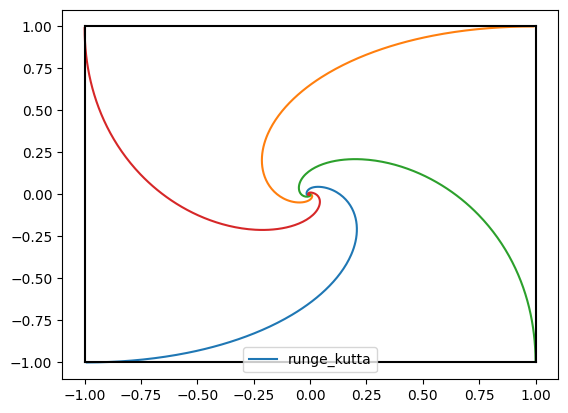

In [ ]:
    ys, xs = [], []
    ys, xs = plot_trajectory(-1, -1)
    plt.plot(xs, ys, label='runge_kutta')
    ys, xs = plot_trajectory(1, 1)
    plt.plot(xs, ys)
    ys, xs = plot_trajectory(-1, 1)
    plt.plot(xs, ys)
    ys, xs = plot_trajectory(1, -1)
    plt.plot(xs, ys)
    plt.plot([-1, 1], [-1, -1], color = 'black')
    plt.plot([1, 1], [-1, 1], color = 'black')
    plt.plot([-1, 1], [1, 1], color = 'black')
    plt.plot([-1, -1], [-1, 1], color = 'black')
    plt.legend()
    plt.show()

# **аналитика**

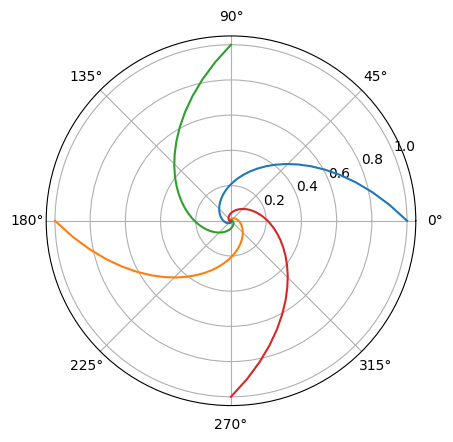

In [ ]:
plt.subplot(111, projection = 'polar')        # Полярная система координат
phi1 = np.arange(0, 2*pi, 0.1)
plt.plot(phi1, [exp(-i) for i in phi1])
phi1 = np.arange(1*pi, 3*pi, 0.1)
plt.plot(phi1, [1/exp(-pi)*exp(-i) for i in phi1])
phi1 = np.arange(1/2*pi, 5/2*pi, 0.1)
plt.plot(phi1, [1/exp(-1/2*pi)*exp(-i) for i in phi1])
phi1 = np.arange(3/2*pi, 7/2*pi, 0.1)
plt.plot(phi1, [1/exp(-3/2*pi)*exp(-i) for i in phi1])

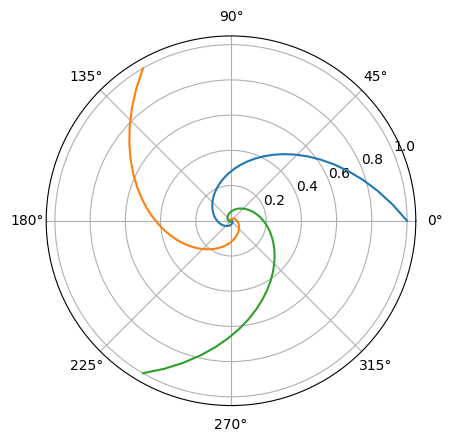

In [ ]:
n = 3
plt.subplot(111, projection = 'polar')
phi1 = np.arange(0, 2*pi, 0.1)
plt.plot(phi1, [exp(-i*atan(pi/n)) for i in phi1])
phi1 = np.arange(2/3*pi, 8/3*pi, 0.1)
plt.plot(phi1, [1/exp(-atan(pi/n)*2/3*pi)*exp(-i*atan(pi/n)) for i in phi1])
phi1 = np.arange(4/3*pi, 10/3*pi, 0.1)
plt.plot(phi1, [1/exp(-atan(pi/n)*4/3*pi)*exp(-i*atan(pi/n)) for i in phi1])

# **Обобщение на все правильные многоугольники**

In [ ]:
def analitic_npolygon(n):
  plt.subplot(111, projection = 'polar')
  phi_start = 0
  for i in range(n):
    phi = np.arange(phi_start, phi_start+4*pi, 0.1)
    plt.plot(phi, [1/exp(-atan(pi/n)*phi_start)*exp(-i*atan(pi/n)) for i in phi])
    phi_start = phi_start+2*pi/n

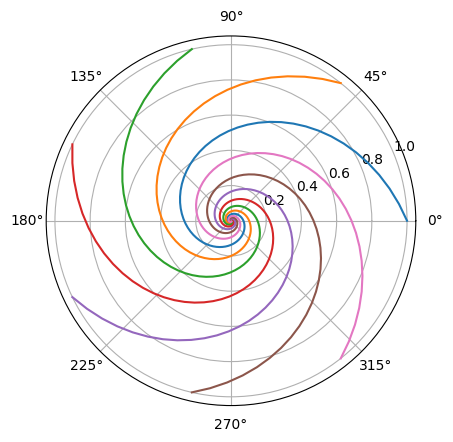

In [ ]:
n = 7
analitic_npolygon(n)